In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import zipfile

path = '44675478.zip'
with zipfile.ZipFile(path) as z:
    print(z.namelist())

['data/FITB.csv', 'data/KHC.csv', 'data/CTAS.csv', 'data/CPRT.csv']


In [11]:
with zipfile.ZipFile(path) as z:
    with z.open('data/KHC.csv') as f:
        KHC = pd.read_csv(f)

with zipfile.ZipFile(path) as z:
    with z.open('data/FITB.csv') as f:
        FITB = pd.read_csv(f)

with zipfile.ZipFile(path) as z:
    with z.open('data/CTAS.csv') as f:
        CTAS = pd.read_csv(f)

with zipfile.ZipFile(path) as z:
    with z.open('data/CPRT.csv') as f:
        CPRT = pd.read_csv(f)

companies = {"FITB": FITB, "KHC": KHC, "CTAS": CTAS, "CPRT": CPRT}

In [12]:
for firm, df in companies.items():
    print(f"the highest recorded Adj price for company {firm} is {df['High'].max()}")
    print(f"the lowest recorded Adj price for company {firm} is {df['High'].min()}")

the highest recorded Adj price for company FITB is 45.237
the lowest recorded Adj price for company FITB is 10.766
the highest recorded Adj price for company KHC is 69.587
the lowest recorded Adj price for company KHC is 18.107
the highest recorded Adj price for company CTAS is 112.063
the lowest recorded Adj price for company CTAS is 23.055
the highest recorded Adj price for company CPRT is 40.28
the lowest recorded Adj price for company CPRT is 7.019


In [18]:
import statistics
for firm, df in companies.items():
    df["LogReturns"] = np.log(df["Close"]) - np.log(df["Close"].shift(1))
    print(f"for company {firm} the min Log Return is {df['LogReturns'].min()}")
    print(f"for company {firm} the max Log Return is {df['LogReturns'].max()}")
    print(f"for company {firm} the mean Log Return is {np.mean(df['LogReturns'])}")
    

for company FITB the min Log Return is -0.2456543597087708
for company FITB the max Log Return is 0.16983039426383373
for company FITB the mean Log Return is 0.00026060786086811875
for company KHC the min Log Return is -0.32104427403123825
for company KHC the max Log Return is 0.1780795751744435
for company KHC the mean Log Return is -0.000334144132867949
for company CTAS the min Log Return is -0.18465343360310138
for company CTAS the max Log Return is 0.13679713651433767
for company CTAS the mean Log Return is 0.0010080648825760436
for company CPRT the min Log Return is -0.15144910670664746
for company CPRT the max Log Return is 0.16001494651792347
for company CPRT the mean Log Return is 0.0009774845393166125


In [19]:
for firm, df in companies.items():
    gain = df.loc[df['LogReturns'] == df["LogReturns"].max(), 'Date']
    loss = df.loc[df['LogReturns'] == df["LogReturns"].min(), 'Date']
    print(f"{firm}'s highest logarithmic gain was recorded on {gain[gain.index[0]]}")
    print(f"{firm}'s lowest logarithmic gain was recorded on {loss[loss.index[0]]}")

FITB's highest logarithmic gain was recorded on 2020-03-24
FITB's lowest logarithmic gain was recorded on 2020-03-16
KHC's highest logarithmic gain was recorded on 2020-03-13
KHC's lowest logarithmic gain was recorded on 2019-02-22
CTAS's highest logarithmic gain was recorded on 2020-05-14
CTAS's lowest logarithmic gain was recorded on 2020-03-16
CPRT's highest logarithmic gain was recorded on 2020-03-24
CPRT's lowest logarithmic gain was recorded on 2020-03-20


In [20]:
totalretrn = {}
for firm,df in companies.items():
    df["cumsum"] = df["Close"].agg(np.cumsum)
    first = df["cumsum"][0]
    last = df["cumsum"][len(df) - 1]
    totalret = last - first
    totalretrn.update({firm:totalret})

tr = pd.DataFrame(totalretrn, index=["totalreturn"]).T
tr

C:\Users\matej\AppData\Local\Temp\ipykernel_38412\2593160408.py:3: FutureWarning: The provided callable <function cumsum at 0x000002AB2EE053A0> is currently using Series.cumsum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "cumsum" instead.
  df["cumsum"] = df["Close"].agg(np.cumsum)
C:\Users\matej\AppData\Local\Temp\ipykernel_38412\2593160408.py:3: FutureWarning: The provided callable <function cumsum at 0x000002AB2EE053A0> is currently using Series.cumsum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "cumsum" instead.
  df["cumsum"] = df["Close"].agg(np.cumsum)
C:\Users\matej\AppData\Local\Temp\ipykernel_38412\2593160408.py:3: FutureWarning: The provided callable <function cumsum at 0x000002AB2EE053A0> is currently using Series.cumsum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass th

,totalreturn
FITB,38669.325
KHC,56656.211
CTAS,90409.104
CPRT,31776.744


In [ ]:
#Answer for 6 is CPRT

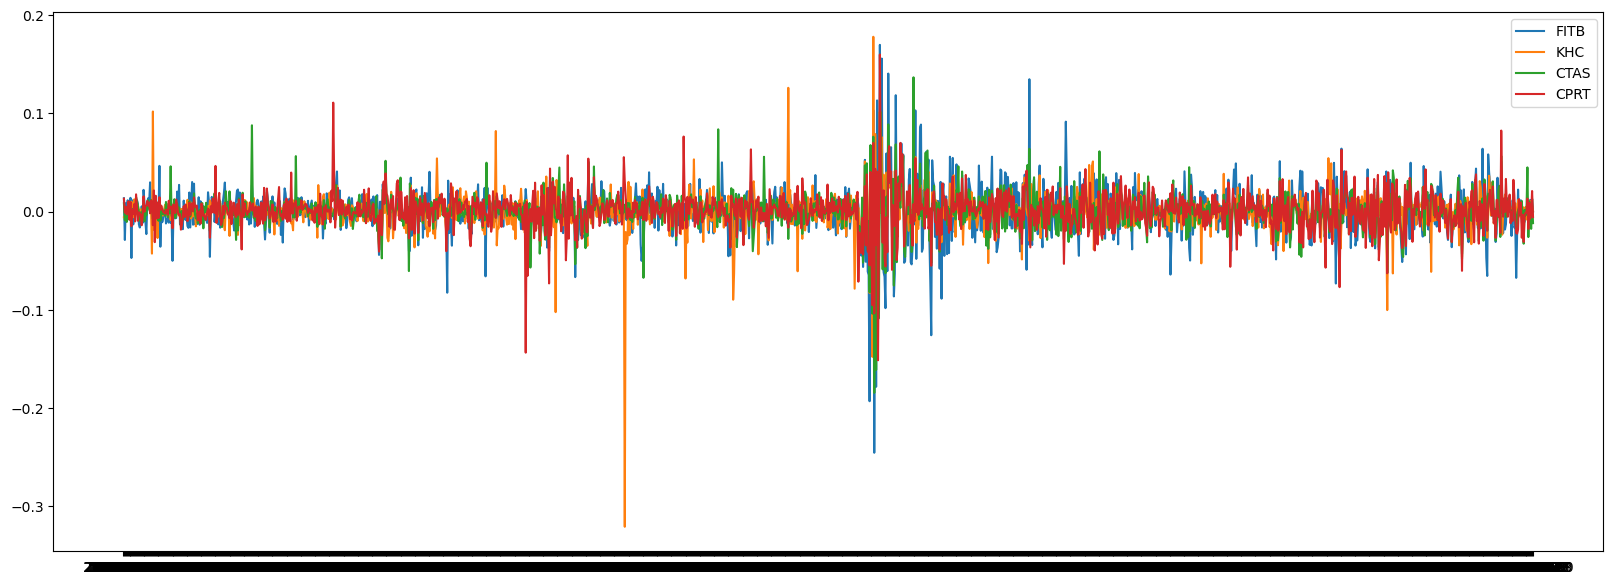

In [21]:
plt.subplots(1,1, figsize = (20,7))
for firm, df in companies.items():
    plt.plot(df["Date"],df["LogReturns"], label = firm)
plt.legend()

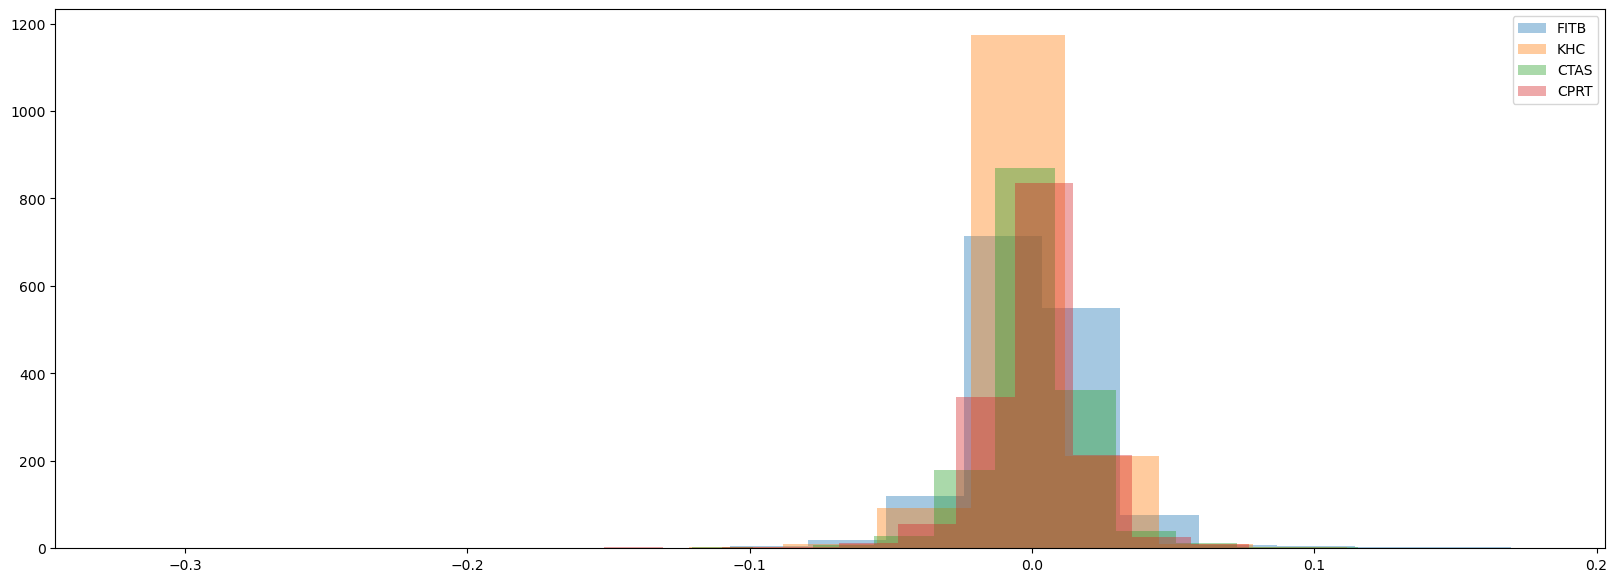

In [22]:
plt.subplots(1,1, figsize = (20,7))
for firm, df in companies.items():
    plt.hist(df["LogReturns"], label = firm, bins= 15, alpha = 0.4)
plt.legend()

In [30]:
import requests
import io
url = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv."
req = requests.get(url).content
data =pd.read_csv(io.StringIO(req.decode('utf-8')))

In [32]:
import random

x = random.uniform(low=0.0, high=1.0, size=None)

print(x)

TypeError: Random.uniform() got an unexpected keyword argument 'low'